# EJERCICIOS

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization,Input,Flatten,Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import HeNormal,LecunNormal
from tensorflow.keras.activations import swish
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.layers import BatchNormalization


In [6]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

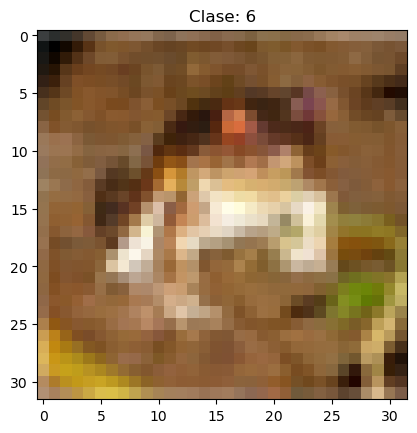

In [7]:
# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_temp, y_temp) = tf.keras.datasets.cifar10.load_data()

# Dividir los datos de entrenamiento en subconjuntos de entrenamiento y validación
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5)

# Mostrar una de las imágenes de entrenamiento
plt.imshow(x_train[0])  # Muestra la primera imagen del conjunto de entrenamiento
plt.title(f"Clase: {y_train[0][0]}")  # Título con la clase de la imagen
plt.show()

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [8]:
# Definir el modelo
input_layer = Input(shape=(32, 32, 3))  # Entrada: imágenes de tamaño 32x32x3
x = Flatten()(input_layer)  # Aplanar la entrada a un vector 1D

# Añadir las 20 capas ocultas con 100 neuronas cada una
for _ in range(20):
    x = Dense(100, activation=swish, kernel_initializer=HeNormal())(x)

# Capa de salida con 10 neuronas y activación softmax (para clasificación múltiple)
output_layer = Dense(10, activation='softmax')(x)

# Crear el modelo
model = Model(inputs=input_layer, outputs=output_layer)

# Mostrar un resumen del modelo
model.summary()

I0000 00:00:1736970044.773992    5877 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9422 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [9]:
# Lista de tasas de aprendizaje a probar
tasas_aprendizaje = [0.001, 0.005, 0.01, 0.05, 0.1]

# Diccionario para almacenar los resultados
resultados = []
best_val_accuracy = 0
max_lr = None

# Bucle para probar las diferentes tasas de aprendizaje
for lr in tasas_aprendizaje:
    print(f'Entrenando modelo con tasa de aprendizaje {lr}...')

    # Definir el optimizador Nadam con la tasa de aprendizaje actual
    optimizer = Nadam(learning_rate=lr)
    
    # Compilar el modelo
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])
    
    # Entrenar el modelo y medir el tiempo de entrenamiento
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), verbose=1)
    end_time = time.time()
    
    # Calcular el tiempo total de entrenamiento
    total_time = end_time - start_time
    
    # Evaluar el modelo en el conjunto de entrenamiento y validación
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        max_lr = lr
        resultados = [{
            'Red neuronal normal': {
                'Tasa de aprendizaje': lr,
                'Entrenamiento sparse categorical accuracy': train_acc,
                'Validación sparse categorical accuracy': val_acc,
                'Tiempo total (s)': total_time
            }
        }]
        
# Mostrar los resultados
print(resultados)

Entrenando modelo con tasa de aprendizaje 0.001...
Epoch 1/10


I0000 00:00:1736970048.789348   10581 service.cc:148] XLA service 0x7a0318014760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736970048.789466   10581 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-01-15 20:40:48.861607: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736970049.185306   10581 cuda_dnn.cc:529] Loaded cuDNN version 90600


 56/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 86.1118 - sparse_categorical_accuracy: 0.1010 

I0000 00:00:1736970050.089077   10581 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 13.7662 - sparse_categorical_accuracy: 0.1927 - val_loss: 1.9531 - val_sparse_categorical_accuracy: 0.2740
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8999 - sparse_categorical_accuracy: 0.3029 - val_loss: 1.8406 - val_sparse_categorical_accuracy: 0.3370
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8208 - sparse_categorical_accuracy: 0.3382 - val_loss: 1.7879 - val_sparse_categorical_accuracy: 0.3602
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7735 - sparse_categorical_accuracy: 0.3589 - val_loss: 1.7169 - val_sparse_categorical_accuracy: 0.3782
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7315 - sparse_categorical_accuracy: 0.3701 - val_loss: 1.6787 - val_sparse_categorical_accuracy: 0.3918
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7089 - sparse_categorical_accuracy: 0.3790 - val_loss: 1.6847 - val_sparse_categorical_accuracy: 0.3880
Epoch 7/10
782

### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [10]:
early_stopping = EarlyStopping(monitor='sparse_categorical_accuracy', patience=3, restore_best_weights=True)

# Definir el optimizador Nadam con la tasa de aprendizaje actual
optimizer = Nadam(learning_rate=max_lr)

# Compilar el modelo
model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['sparse_categorical_accuracy'])

# Entrenar el modelo y medir el tiempo de entrenamiento
start_time = time.time()
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_val, y_val), verbose=1,callbacks=[early_stopping])
end_time = time.time()

# Calcular el tiempo total de entrenamiento
total_time = end_time - start_time

# Evaluar el modelo en el conjunto de entrenamiento y validación
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)

# Obtener la mejor época considerando la detención temprana
best_epoch = early_stopping.stopped_epoch - early_stopping.patience + 1

# Guardar los resultados
resultados.append({
    'Red neuronal normal con detención temprana': {
        'Tasa de aprendizaje': max_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': total_time,
        'Mejor época': best_epoch
    }
})

print(resultados[1])



Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 2.3048 - sparse_categorical_accuracy: 0.0993 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.1040
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3029 - sparse_categorical_accuracy: 0.1019 - val_loss: 2.3025 - val_sparse_categorical_accuracy: 0.0970
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3031 - sparse_categorical_accuracy: 0.1001 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1044
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3029 - sparse_categorical_accuracy: 0.1006 - val_loss: 2.3024 - val_sparse_categorical_accuracy: 0.1040
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3029 - sparse_categorical_accuracy: 0.1018 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.0998
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3029 - sparse_categorical_accuracy: 0.0998 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.099

### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [11]:
# Definir el modelo con normalización de lotes
input_layer = Input(shape=(32, 32, 3))  # Entrada: imágenes de tamaño 32x32x3
x = Flatten()(input_layer)  # Aplanar la entrada a un vector 1D

# Añadir las 20 capas ocultas con 100 neuronas cada una y normalización de lotes
for _ in range(20):
    x = Dense(100, activation=None, kernel_initializer=HeNormal())(x)  # Capa densa
    x = BatchNormalization()(x)  # Añadir normalización de lotes
    x = Activation('swish')(x)  # Añadir activación swish
# Capa de salida con 10 neuronas y activación softmax (para clasificación múltiple)
output_layer = Dense(10, activation='softmax')(x)

# Crear el modelo
model_norma = Model(inputs=input_layer, outputs=output_layer)

# Mostrar un resumen del modelo
model_norma.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100)            │           40

 Total params: 508,210 (1.94 MB)

 Trainable params: 504,210 (1.92 MB)

 Non-trainable params: 4,000 (15.62 KB)

In [12]:
# Lista de tasas de aprendizaje a probar
tasas_aprendizaje = [0.001, 0.005, 0.01, 0.05, 0.1]

# Diccionario para almacenar los resultados
resultados_normalizados = []
best_val_accuracy = 0
max_lr = None

# Bucle para probar las diferentes tasas de aprendizaje
for lr in tasas_aprendizaje:
    print(f'Entrenando modelo con tasa de aprendizaje {lr}...')

    # Definir el optimizador Nadam con la tasa de aprendizaje actual
    optimizer = Nadam(learning_rate=lr)
    
    # Compilar el modelo
    model_norma.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])
    
    # Entrenar el modelo y medir el tiempo de entrenamiento
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), verbose=1)
    end_time = time.time()
    
    # Calcular el tiempo total de entrenamiento
    total_time = end_time - start_time
    
    # Evaluar el modelo en el conjunto de entrenamiento y validación
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        max_lr = lr
        resultados_normalizados = [{
            'Red neuronal con normalización de lotes': {
                'Tasa de aprendizaje': lr,
                'Entrenamiento sparse categorical accuracy': train_acc,
                'Validación sparse categorical accuracy': val_acc,
                'Tiempo total (s)': total_time
            }
        }]
        
# Mostrar los resultados
print(resultados_normalizados)

Entrenando modelo con tasa de aprendizaje 0.001...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3029 - sparse_categorical_accuracy: 0.0989 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.0998
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3029 - sparse_categorical_accuracy: 0.1017 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1012
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3030 - sparse_categorical_accuracy: 0.0983 - val_loss: 2.3024 - val_sparse_categorical_accuracy: 0.1012
Epoch 4/10
406/782 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3031 - sparse_categorical_accuracy: 0.0976

KeyboardInterrupt: 

In [16]:
early_stopping = EarlyStopping(monitor='sparse_categorical_accuracy', patience=3, restore_best_weights=True)

# Entrenar el modelo con early stopping y medir el tiempo de entrenamiento
start_time = time.time()
history = model_norma.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_val, y_val), verbose=1, callbacks=[early_stopping])
end_time = time.time()

# Calcular el tiempo total de entrenamiento
total_time = end_time - start_time

# Evaluar el modelo en el conjunto de entrenamiento y validación
train_acc = history.history['sparse_categorical_accuracy'][-1]
val_acc = history.history['val_sparse_categorical_accuracy'][-1]


resultados_normalizados.append({
    'Red neuronal con normalización de lotes y detención temprana': {
        'Tasa de aprendizaje': max_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': total_time,
        'Mejor época': early_stopping.stopped_epoch
    }
})

print(resultados_normalizados[1])


Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 2.3430 - sparse_categorical_accuracy: 0.1546 - val_loss: 2.5801 - val_sparse_categorical_accuracy: 0.1461
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 2.1943 - sparse_categorical_accuracy: 0.1574 - val_loss: 3.7998 - val_sparse_categorical_accuracy: 0.1050
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 2.1471 - sparse_categorical_accuracy: 0.1688 - val_loss: 180200439808.0000 - val_sparse_categorical_accuracy: 0.1059
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 2.1913 - sparse_categorical_accuracy: 0.1627 - val_loss: 20041299078185078967238656.0000 - val_sparse_categorical_accuracy: 0.1642
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 2.1415 - sparse_categorical_accuracy: 0.1882 - val_loss: 501935119971617501675431919616.0000 - val_sparse_categorical_accuracy: 0.1555
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 2.0548 - sparse_categorical_accu

### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

In [16]:
# Definir el modelo con normalización de lotes
input_layer = Input(shape=(32, 32, 3))  # Entrada: imágenes de tamaño 32x32x3
x = Flatten()(input_layer)  # Aplanar la entrada a un vector 1D

# Añadir las 20 capas ocultas con 100 neuronas cada una y normalización de lotes
for _ in range(20):
    x = Dense(100, activation=None, kernel_initializer=LecunNormal())(x)  # Capa densa
    x = Activation('selu')(x)  # Añadir activación swish
# Capa de salida con 10 neuronas y activación softmax (para clasificación múltiple)
output_layer = Dense(10, activation='softmax')(x)

# Crear el modelo
model_selu = Model(inputs=input_layer, outputs=output_layer)

# Mostrar un resumen del modelo
model_selu.summary()

# Estandarización de los datos de entrenamiento y prueba
mean_train = np.mean(x_train, axis=(0, 1, 2), keepdims=True)
std_train = np.std(x_train, axis=(0, 1, 2), keepdims=True)

# Normalizamos los datos de entrenamiento
x_train_standardized = (x_train - mean_train) / (std_train + 1e-7)  # Evitar división por cero

# Normalizamos los datos de prueba
x_test_standardized = (x_test - mean_train) / (std_train + 1e-7)  # Usamos la media y std de train

# Normalizamos los datos de validacion
x_val_standardized = (x_val - mean_train) / (std_train + 1e-7)  # Usamos la media y std de val

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_40 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_41 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_42 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_43 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_44 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_45 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_46 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_47 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_48 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_49 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_50 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 100)            │        10,10

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Lista de tasas de aprendizaje a probar
tasas_aprendizaje = [0.001, 0.005, 0.01, 0.05, 0.1]

# Diccionario para almacenar los resultados
resultados_selu = []
best_val_accuracy = 0
max_lr = None

# Bucle para probar las diferentes tasas de aprendizaje
for lr in tasas_aprendizaje:
    print(f'Entrenando modelo con tasa de aprendizaje {lr}...')

    # Definir el optimizador Nadam con la tasa de aprendizaje actual
    optimizer = Nadam(learning_rate=lr)
    
    # Compilar el modelo
    model_selu.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])
    
    # Entrenar el modelo y medir el tiempo de entrenamiento
    start_time = time.time()
    history = model.fit(x_train_standardized, y_train, epochs=10, batch_size=64, validation_data=(x_val_standardized, y_val), verbose=1)
    end_time = time.time()
    
    # Calcular el tiempo total de entrenamiento
    total_time = end_time - start_time
    
    # Evaluar el modelo en el conjunto de entrenamiento y validación
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        max_lr = lr
        resultados_selu = [{
            'Red neuronal con activacion selu': {
                'Tasa de aprendizaje': lr,
                'Entrenamiento sparse categorical accuracy': train_acc,
                'Validación sparse categorical accuracy': val_acc,
                'Tiempo total (s)': total_time
            }
        }]
        
# Mostrar los resultados
print(resultados_selu)

Entrenando modelo con tasa de aprendizaje 0.001...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0934 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.0943
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0979 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.0992
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.1050 - val_loss: 2.3025 - val_sparse_categorical_accuracy: 0.1006
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.1021 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.0943
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0991 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.1006
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0988 - val_loss: 2.

In [23]:
early_stopping = EarlyStopping(monitor='sparse_categorical_accuracy', patience=3, restore_best_weights=True)

# Entrenar el modelo con early stopping y medir el tiempo de entrenamiento
start_time = time.time()
history = model_selu.fit(x_train_standardized, y_train, epochs=100, batch_size=64, validation_data=(x_val_standardized, y_val), verbose=1, callbacks=[early_stopping])
end_time = time.time()

# Calcular el tiempo total de entrenamiento
total_time = end_time - start_time

# Evaluar el modelo en el conjunto de entrenamiento y validación
train_acc = history.history['sparse_categorical_accuracy'][-1]
val_acc = history.history['val_sparse_categorical_accuracy'][-1]

resultados_selu.append({
    'Red neuronal con activacion selu y detención temprana': {
        'Tasa de aprendizaje': max_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': total_time,
        'Mejor época': early_stopping.stopped_epoch
    }
})

print(resultados_selu[1])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 9769315328.0000 - sparse_categorical_accuracy: 0.1024 - val_loss: 3.1472 - val_sparse_categorical_accuracy: 0.0992
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.9767 - sparse_categorical_accuracy: 0.1000 - val_loss: 3.4591 - val_sparse_categorical_accuracy: 0.1006
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.0708 - sparse_categorical_accuracy: 0.0986 - val_loss: 3.1219 - val_sparse_categorical_accuracy: 0.0943
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.1666 - sparse_categorical_accuracy: 0.0961 - val_loss: 2.4820 - val_sparse_categorical_accuracy: 0.0943
{'Red neuronal con activacion selu y detención temprana': {'Tasa de aprendizaje': 0.01, 'Entrenamiento sparse categorical accuracy': 0.16635000705718994, 'Validación sparse categorical accuracy': 0.1695999950170517, 'Tiempo total (s)': 20.95202660560608, 'Mejor época': 6}}


### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.

In [22]:
# Definir el modelo con normalización de lotes
input_layer = Input(shape=(32, 32, 3))  # Entrada: imágenes de tamaño 32x32x3
x = Flatten()(input_layer)  # Aplanar la entrada a un vector 1D

# Añadir las 20 capas ocultas con 100 neuronas cada una y normalización de lotes
for _ in range(20):
    x = Dense(100, activation=None, kernel_initializer=LecunNormal())(x)  # Capa densa
    x = Activation('selu')(x)  # Añadir activación swish
# Capa de salida con 10 neuronas y activación softmax (para clasificación múltiple)

# Añadir capa Dropout antes de la capa de salida (regularización)
x = Dropout(0.5)(x)  # Dropout con tasa del 50%

output_layer = Dense(10, activation='softmax')(x)

# Crear el modelo
model_dropout = Model(inputs=input_layer, outputs=output_layer)

# Mostrar un resumen del modelo
model_dropout.summary()

# Estandarización de los datos de entrenamiento y prueba
mean_train = np.mean(x_train, axis=(0, 1, 2), keepdims=True)
std_train = np.std(x_train, axis=(0, 1, 2), keepdims=True)

# Normalizamos los datos de entrenamiento
x_train_standardized = (x_train - mean_train) / (std_train + 1e-7)  # Evitar división por cero

# Normalizamos los datos de prueba
x_test_standardized = (x_test - mean_train) / (std_train + 1e-7)  # Usamos la media y std de train

# Normalizamos los datos de validacion
x_val_standardized = (x_val - mean_train) / (std_train + 1e-7)  # Usamos la media y std de val

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_80 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_81 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_82 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_83 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_84 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_85 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_86 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_87 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_88 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_89 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_90 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 100)            │        10,10

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Lista de tasas de aprendizaje a probar
tasas_aprendizaje = [0.001, 0.005, 0.01, 0.05, 0.1]

# Diccionario para almacenar los resultados
resultados_dropout = []
best_val_accuracy = 0
max_lr = None

# Bucle para probar las diferentes tasas de aprendizaje
for lr in tasas_aprendizaje:
    print(f'Entrenando modelo con tasa de aprendizaje {lr}...')

    # Definir el optimizador Nadam con la tasa de aprendizaje actual
    optimizer = Nadam(learning_rate=lr)
    
    # Compilar el modelo
    model_dropout.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])
    
    # Entrenar el modelo y medir el tiempo de entrenamiento
    start_time = time.time()
    history = model.fit(x_train_standardized, y_train, epochs=10, batch_size=64, validation_data=(x_val_standardized, y_val), verbose=1)
    end_time = time.time()
    
    # Calcular el tiempo total de entrenamiento
    total_time = end_time - start_time
    
    # Evaluar el modelo en el conjunto de entrenamiento y validación
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        max_lr = lr
        resultados_dropout = [{
            'Red neuronal con activacion selu': {
                'Tasa de aprendizaje': lr,
                'Entrenamiento sparse categorical accuracy': train_acc,
                'Validación sparse categorical accuracy': val_acc,
                'Tiempo total (s)': total_time
            }
        }]
        
# Mostrar los resultados
print(resultados_dropout)

Entrenando modelo con tasa de aprendizaje 0.001...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.1022 - val_loss: 2.3032 - val_sparse_categorical_accuracy: 0.0987
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.1014 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.0943
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0991 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.0987
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.1030 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.0943
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0968 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.0987
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0970 - val_loss: 2.

In [25]:
early_stopping = EarlyStopping(monitor='sparse_categorical_accuracy', patience=3, restore_best_weights=True)

# Entrenar el modelo con early stopping y medir el tiempo de entrenamiento
start_time = time.time()
history = model_dropout.fit(x_train_standardized, y_train, epochs=100, batch_size=64, validation_data=(x_val_standardized, y_val), verbose=1, callbacks=[early_stopping])
end_time = time.time()

# Calcular el tiempo total de entrenamiento
total_time = end_time - start_time

# Evaluar el modelo en el conjunto de entrenamiento y validación
train_acc = history.history['sparse_categorical_accuracy'][-1]
val_acc = history.history['val_sparse_categorical_accuracy'][-1]

resultados_dropout.append({
    'Red neuronal con activacion selu y detención temprana': {
        'Tasa de aprendizaje': max_lr,
        'Entrenamiento sparse categorical accuracy': train_acc,
        'Validación sparse categorical accuracy': val_acc,
        'Tiempo total (s)': total_time,
        'Mejor época': early_stopping.stopped_epoch
    }
})

print(resultados_dropout[1])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 265179568.0000 - sparse_categorical_accuracy: 0.0985 - val_loss: 2.7545 - val_sparse_categorical_accuracy: 0.1006
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.6020 - sparse_categorical_accuracy: 0.1027 - val_loss: 2.7024 - val_sparse_categorical_accuracy: 0.1006
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.6158 - sparse_categorical_accuracy: 0.0967 - val_loss: 2.6548 - val_sparse_categorical_accuracy: 0.1006
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.5004 - sparse_categorical_accuracy: 0.1001 - val_loss: 2.7326 - val_sparse_categorical_accuracy: 0.0999
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.5481 - sparse_categorical_accuracy: 0.1004 - val_loss: 2.4575 - val_sparse_categorical_accuracy: 0.0999
{'Red neuronal con activacion selu y detención temprana': {'Tasa de aprendizaje': 0.1, 'Entrenamiento sparse categorical accuracy': 0.10042499750852585, 'Val